## Pseudobulk DEG analysis (Figure 2B-E)

This notebook includes code that identifies DEGs in each group (Sal vs mor, mor vs nal) with the data in a pseudobulk configuration (i.e. agnostic to cell cluster). First we identify the list of DEGs for each condition. Then we split the data up into the cell clusters to look more closely at cell-type-specific variations in DEG enrichment

#### Import libraries

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
library(xlsx)
library(ggplot2)
library(ggrepel)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




#### Load in .rds files

In [2]:
LS.integrated<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated.rds")
LS_sal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_sal.rds")
LS_mor<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_mor.rds")
LS_nal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal.rds")
LS_one_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal_no_mor.rds")

#### Assign identities to cell clusters

In [3]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [4]:
table(Idents(LS.integrated))


 Gaba1  Gaba2  Gaba3  Gaba4  Gaba5  Gaba6  Gaba7   Glu1  Gaba8  Gaba9 Gaba10 
  3124   2731   2316   2248   2157   2116   2028   1919   1904   1860   1634 
  Glu2 Gaba11 Gaba12 
  1015    437    118 

In [5]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_LS_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

#### Identifying DEGs in pseudobulk

In [ ]:
celltype.stim<-vector()
for (i in 1:dim(LS.integrated@meta.data)[1]){
    if(LS.integrated@meta.data$stim[i]=="LS_sal"){celltype.stim[i]<-"Sal"}
    else if(LS.integrated@meta.data$stim[i]=="LS_mor"){celltype.stim[i]<-"Mor"}
    else if(LS.integrated@meta.data$stim[i]=="LS_nal"){celltype.stim[i]<-"Nal"}
    else if(LS.integrated@meta.data$stim[i]=="LS_one_mor"){celltype.stim[i]<-"Mor_one"}
    else if(LS.integrated@meta.data$stim[i]=="LS_nal_no_mor"){celltype.stim[i]<-"Nal_only"}
    
}
LS.integrated@meta.data$celltype.stim<-celltype.stim

In [ ]:
LS.integrated[["celltype"]] <- Idents(object = LS.integrated)
Idents(LS.integrated = LS.integrated) <- LS.integrated@meta.data$celltype.stim

In [ ]:
Cell_type <- c("Sal","Mor","Nal","Mor_one","Nal_only")

In [ ]:
DefaultAssay(LS.integrated) <- 'RNA'

In [ ]:
one.markers <- FindMarkers(assay="RNA",slot='data',LS.integrated, ident.1 = "Sal", ident.2 = "Mor", grouping.var = "stim",print.bar = TRUE,min.pct = 0,min.cells.gene = 3, min.cells.group = 1, logfc.threshold = 0.01)
one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(sort_marker, file=("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Group/sal_v_mor_RNA_allgenes.xlsx"))

In [ ]:
one.markers <- FindMarkers(assay="RNA",LS.integrated, ident.1 = "Mor", ident.2 = "Nal", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0.01,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)
one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(sort_marker, file=("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Group/mor_v_nal_RNA_allgenes.xlsx"))

In [ ]:
one.markers <- FindMarkers(assay="RNA",LS.integrated, ident.1 = "Sal", ident.2 = "Nal", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0.1,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)
one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(subset(sort_marker,avg_log2FC>0 & p_val_adjust<0.05 & pct.1>0.05),file=("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Group/sal_v_nal_RNA.xlsx"))

#### Plotting pseudobulk identified DEGs

In [6]:
# load in data
Mor_gene<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Group/mor_v_sal_RNA_allgenes.xlsx",sheetIndex=1)

In [7]:
dir <-vector(mode="numeric", length=0)
for (i in 1:length(Mor_gene$avg_log2FC)){
    if (Mor_gene$avg_log2FC[i] > 0.10 & Mor_gene$p_val_adjust[i] < 0.05) {dir[i] <- "Up"}
    else if (Mor_gene$avg_log2FC[i] < -0.10 & Mor_gene$p_val_adjust[i] < 0.05) {dir[i] <- "Down"}
    else {dir[i] <- "N"}
}

Mor_gene <- cbind(Mor_gene, dir)

Mor_gene$label <- NA
Mor_gene$label[Mor_gene$dir != "N"] <- as.character(Mor_gene$NA.[Mor_gene$dir != "N"])

Warning message:
"Removed 9228 rows containing missing values (geom_text_repel)."
Warning message:
"ggrepel: 3577 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


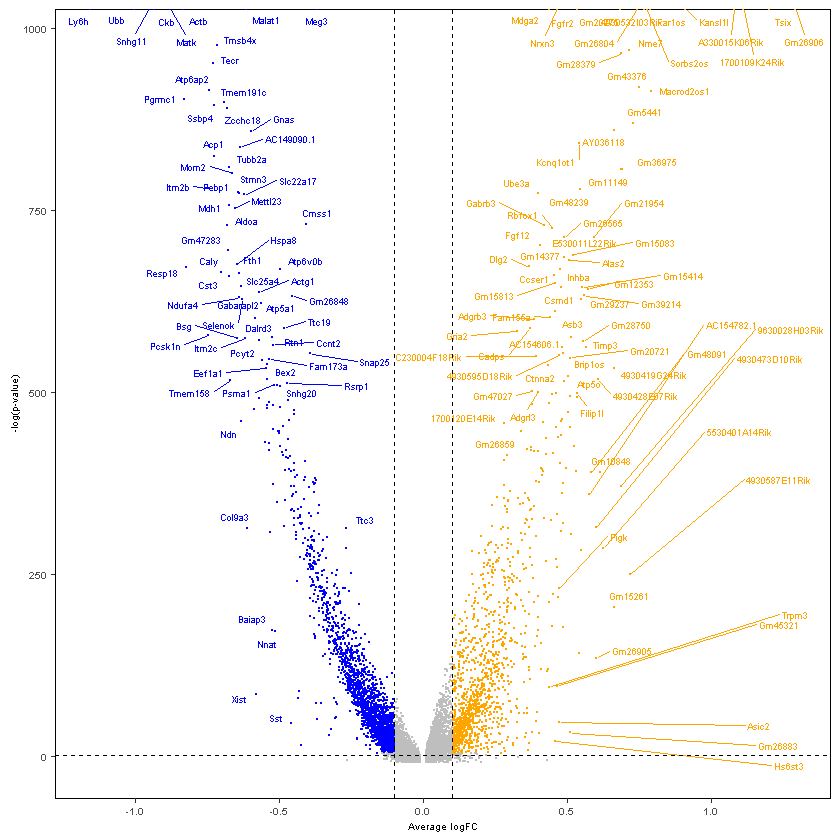

In [8]:
p <- ggplot(Mor_gene, aes(x=avg_log2FC, y=-log2(p_val_adjust), col=dir, label=label)) +
    ggtitle("NAL ppt withdrawal-induced DEGs") +
    geom_point(size=0.3) + 
    geom_text_repel(size=2, max.overlaps=getOption("ggrepel.max.overlaps", default = 15)) +
    theme_classic() + 
    theme(axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text = element_text(size=6),
         axis.title = element_text(size=6),
         axis.ticks = element_line(size=0.25)) +
    geom_vline(xintercept=c(-.1, .1), col="black", linetype="dashed", size=0.1) +
    geom_hline(yintercept=1, col="black",linetype="dashed", size=0.1) +
    scale_color_manual(values=c("blue","gray","orange"))+
    ylab('-log(p-value)')+
    xlab('Average logFC')+
    NoLegend()
p

#### Plotting gene ontology terms

https://maayanlab.cloud/Enrichr/ to identify GO terms

In [9]:
BP_mor_up <- read.table(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rV4/Neurons_only_iter2/DEG/group/GO_analysis_sal_v_mor/GO_Biological_Process_2021_table_mor_up.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")
BP_mor_down <- read.table(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rV4/Neurons_only_iter2/DEG/group/GO_analysis_sal_v_mor/GO_Biological_Process_2021_table_mor_down.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")

In [10]:
new.numb <- unlist(apply(BP_mor_up[2], 1, function(y) sub("/.*","",y)))
BP_mor_up$Overlap <- new.numb
                         
new.numb <- unlist(apply(BP_mor_down[2], 1, function(y) sub("/.*","",y)))
BP_mor_down$Overlap <- new.numb

In [11]:
BP_mor_up_set <- BP_mor_up %>% slice(1:10)
BP_mor_down_set <- BP_mor_down %>% slice(1:10)

terms <- BP_mor_up_set$Term

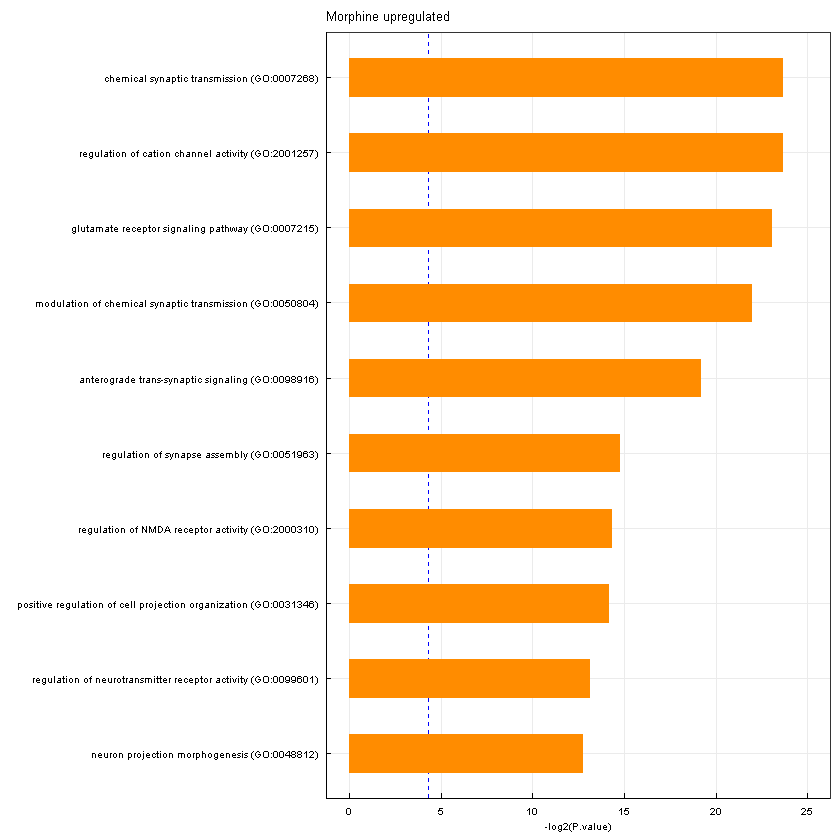

In [12]:
p <- ggplot(BP_mor_up_set, aes(x = Term, y= -log2(Adjusted.P.value)))+
geom_hline(yintercept = -log2(0.05), linetype="dashed", color = "blue", size=.5)+
geom_bar(stat='identity',width=0.5, color='darkorange', fill='darkorange')+
scale_size(range = c(1,3))+
scale_x_discrete(limits= rev(terms))+
scale_y_continuous(limits=c(0,25))+
coord_flip()+
theme_bw()+
theme(plot.title = element_text(size=8),
    axis.title.y = element_blank(),
    axis.title.x = element_text(size=6),
    axis.line=element_line(size=0.25),
    axis.ticks=element_line(size=0.25),
    axis.ticks.length=unit(-0.1, "cm"),
    axis.text.x = element_text(margin=margin(5,5,0,5,"pt"), size=6),
    axis.text.y = element_text(margin=margin(5,5,5,5,"pt"), size=6),
    axis.text = element_text(color = "black", size=6),
    panel.grid.minor = element_blank(),
    legend.position='bottomleft')+
theme(legend.title = element_text(size = 8),
    legend.text = element_text(size = 6), 
    axis.ticks = element_line(colour = "black", size = .25),
     legend.position='none')+
ylab("-log2(P.value)")+
ggtitle('Morphine upregulated')
p

In [13]:
terms <- BP_mor_down_set$Term

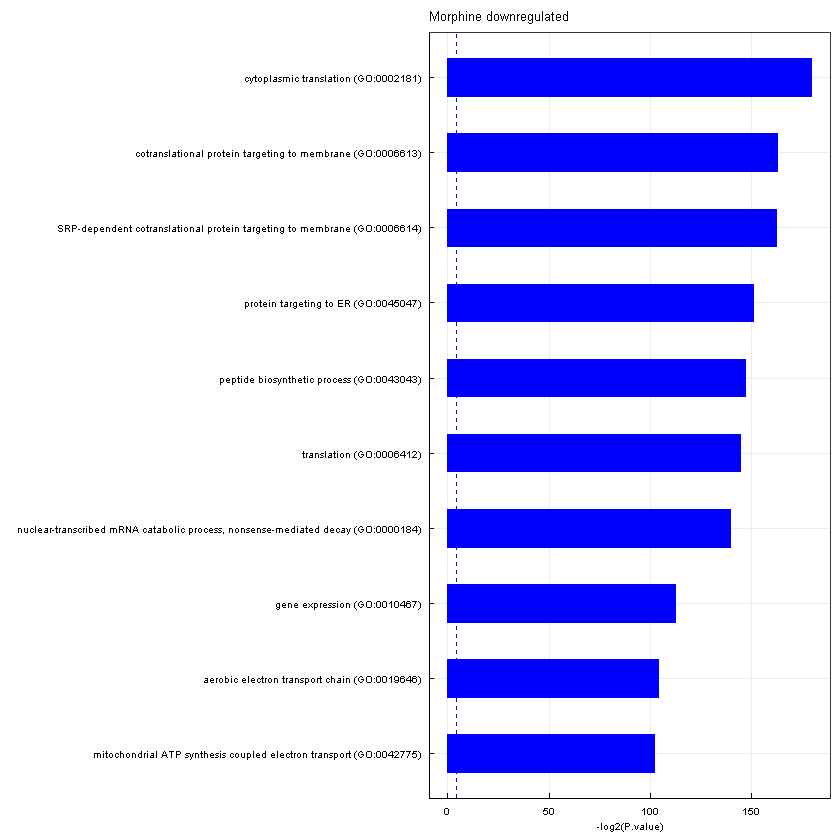

In [14]:
p <- ggplot(BP_mor_down_set, aes(x = Term, y= -log2(Adjusted.P.value)))+
geom_hline(yintercept = -log2(0.05), linetype="dashed", color = "blue", size=.5)+
geom_bar(stat='identity',width=0.5, color='blue', fill='blue')+
scale_size(range = c(1,3))+
scale_x_discrete(limits= rev(terms))+
scale_y_continuous(limits=c(0,180))+
coord_flip()+
theme_bw()+
theme(plot.title = element_text(size=8),
    axis.title.y = element_blank(),
    axis.title.x = element_text(size=6),
    axis.line=element_line(size=0.25),
    axis.ticks=element_line(size=0.25),
    axis.ticks.length=unit(-0.1, "cm"),
    axis.text.x = element_text(margin=margin(5,5,0,5,"pt"), size=6),
    axis.text.y = element_text(margin=margin(5,5,5,5,"pt"), size=6),
    axis.text = element_text(color = "black", size=6),
    panel.grid.minor = element_blank(),
    legend.position='bottomleft')+
theme(legend.title = element_text(size = 8),
    legend.text = element_text(size = 6), 
    axis.ticks = element_line(colour = "black", size = .25),
     legend.position='none')+
ylab("-log2(P.value)")+
ggtitle('Morphine downregulated')
p

#### Calculating logFC of genes of interest between groups and within each cell type

Reload .rds files

In [ ]:
LS.integrated<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated.rds")
LS_sal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_sal.rds")
LS_mor<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_mor.rds")
LS_nal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal.rds")
LS_one_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal_no_mor.rds")

In [ ]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [ ]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_LS_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [15]:
Cell_type<-c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")

In [16]:
DefaultAssay(LS.integrated) <- "RNA"
LS.integrated <- NormalizeData(LS.integrated)

Generating a heatmap for specific DEGs (also includes p-value testing)

In [17]:
assay.data<-data.frame(GetAssayData(LS.integrated, slot='data'))

In [18]:
DEG <- c('Grm1','Grm5','Grm7','Grm8','Grin2a','Gria1','Gria2','Gria3','Gria4','Grid1','Grid2','Grik1','Grik2','Grik3','Gabra2','Gabra3','Gabra5','Gabrb1','Gabrb2','Gabrb3','Gabrg1','Gabrg2','Gabrg3','Cacna1b','Cacna1c','Cacna1e','Cacnb2','Kcnd2','Kcnq5','Kcnt2','Kcnma1')

In [19]:
#only including cells that have any expression of a given DEG
#p value calc through wilcox, post hoc BH

log2FC <- vector()
DEG.df <- data.frame(Cell_type)
p.val <- vector()
p.val.df <- data.frame(Cell_type)

for (i in DEG){
    DEG.data <- assay.data[rownames(assay.data) %in% i,]
    
    for (c in Cell_type){
        cells.con <- intersect(colnames(LS_sal), eval(as.symbol(paste(c,'_barcode',sep=''))))
        cells.stim <- intersect(colnames(LS_mor), eval(as.symbol(paste(c,'_barcode',sep=''))))
    
        data.con <- DEG.data[colnames(DEG.data) %in% cells.con]
        data.stim <- DEG.data[colnames(DEG.data) %in% cells.stim]
        
        p <- wilcox.test(as.numeric(data.con), as.numeric(data.stim))$p.value
        p <- p.adjust(p, method='BH',n=length(Cell_type))
        p <- ifelse(p > 1, 1, p)
        p.val[c] <- p
        
        #include all cells in analysis
        mean.stim <- rowMeans(expm1(data.stim ))
        mean.con <- rowMeans(expm1(data.con ))
        
        #include only cells positive for each gene
        #mean.stim <- rowMeans(expm1(data.stim > 0))
        #mean.con <- rowMeans(expm1(data.con > 0))
        
        mean.diff <- log2(mean.stim) - log2(mean.con)
        mean.diff[is.infinite(mean.diff)]<-NA
        log2FC[c] <- mean.diff 
    
    }
    
    DEG.df <- cbind(DEG.df, data.frame(log2FC))
    log2FC <- vector()
    
    p.val.df <- cbind(p.val.df, data.frame(p.val))
    p.val <- vector()
}

Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(as.numeric(data.con), as.numeric(data.stim)):
"cannot compute exact p-value wit

In [20]:
colnames(p.val.df) <- c('Cell_type',DEG)
colnames(DEG.df) <- c('Cell_type',DEG)

In [21]:
DEG.df

,Cell_type,Grm1,Grm5,Grm7,Grm8,Grin2a,Gria1,Gria2,Gria3,Gria4,...,Gabrg2,Gabrg3,Cacna1b,Cacna1c,Cacna1e,Cacnb2,Kcnd2,Kcnq5,Kcnt2,Kcnma1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Gaba1,Gaba1,0.25963821,0.2588834,0.4005646,0.32342624,0.1799494,0.3918653,0.2946854,0.3084213,0.3024448,...,0.27988137,0.2495432,0.21679736,0.3500606,0.45587124,0.26606465,0.48806520,0.18257600,0.3403779,0.4046657
Gaba2,Gaba2,0.53851636,0.2315032,0.4708673,0.25099328,0.2670386,0.3551259,0.2893994,0.4173176,0.1730292,...,0.24589700,0.2525499,0.10322715,0.2913498,0.38411562,0.20197543,0.50241341,0.31581854,0.5093497,0.5139604
Gaba3,Gaba3,0.39536867,0.2060582,0.4213136,0.36748442,0.0841550,0.3496227,0.3280317,0.2175211,0.2337193,...,0.44937785,0.3111345,0.08382990,0.5220253,0.42780082,0.22156914,0.29484225,0.48841173,0.5016788,0.3351840
Gaba4,Gaba4,0.25023219,0.2400345,0.4679257,0.47651162,0.3976679,0.4264141,0.3295732,0.3466834,0.1961929,...,0.13344939,0.4189827,0.33691632,0.3477103,0.49983415,0.30447234,0.35155119,0.45604961,0.4049972,0.4414178
Gaba5,Gaba5,0.13180351,0.2511096,0.3438993,0.37476925,0.1977685,0.3127889,0.2663332,0.2361190,0.2869413,...,0.26233267,0.2338667,0.23494202,0.2828982,0.40845084,0.36549969,0.29703623,0.26514563,0.5181527,0.4776929
Gaba6,Gaba6,0.23637838,0.1752804,0.4076943,0.43960393,0.1759615,0.2902398,0.3050488,0.2300280,0.2450660,...,0.22806227,0.1876823,0.23781431,0.2455998,0.48732487,0.36629323,0.37107978,0.34748862,0.4646587,0.2523722
Gaba7,Gaba7,0.24141339,0.2652278,0.4545005,0.33535560,0.1738188,0.4497681,0.3397895,0.2977753,0.1400795,...,0.31150384,0.2627897,0.07545009,0.3622228,0.49247683,0.18805580,0.21154758,0.14647881,0.4537205,0.3934106
Glu1,Glu1,0.56370020,0.1556221,0.3457205,0.51614351,-0.1274921,0.3457433,0.4806633,0.4317994,0.4497215,...,0.26268824,0.2312596,-0.02014572,0.4675763,0.32588440,0.08652986,-0.02705954,0.18538023,0.4452755,0.1210077
Gaba8,Gaba8,-0.04718278,0.2350592,0.4485010,0.31473910,0.3022235,0.3994546,0.3029039,0.2988651,0.1393479,...,0.31353314,0.3161694,0.16463181,0.3434930,0.43446385,0.37181010,0.29452597,0.34615026,0.2961035,0.3817956


In [22]:
library(reshape2)
library(scales)

sm.df <- melt(p.val.df)

big.df <- melt(DEG.df)
big.df$p.value <- sm.df$value

#label tile if deemed significantly different
big.df$highlight <- ifelse(big.df$p.value < 0.05, '*',NA)

#order cell types
big.df$Cell_type <- factor(big.df$Cell_type, levels=c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

Using Cell_type as id variables

Using Cell_type as id variables



Warning message:
"Ignoring unknown parameters: label.size, fill"


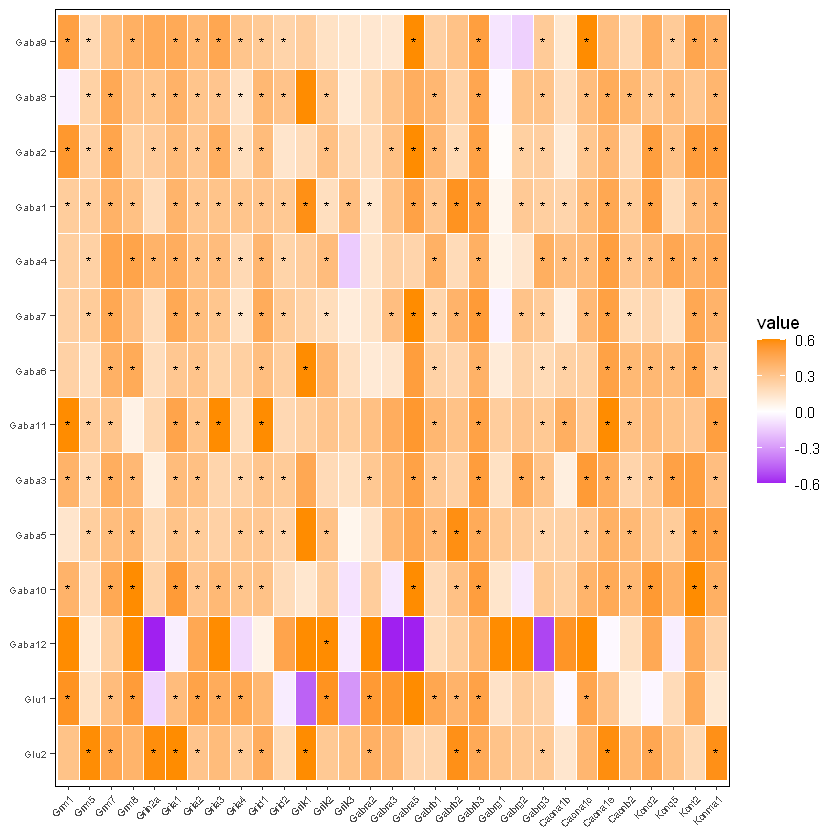

In [23]:
ggplot(big.df, aes(x=Cell_type, y=variable, fill=value, label=highlight)) +
    geom_tile(color='white') + scale_fill_gradient2(limits=c(-0.6,0.6), breaks=seq(-0.6,0.6,by=0.3),low = "purple",mid='white',high = "darkorange", midpoint=0, oob=squish) +
    theme_classic() +
    theme(axis.title=element_blank(),
         axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text.y = element_text(size=6),
         axis.text.x = element_text(size=6,angle=45, hjust=1),
         axis.ticks = element_line(size=0.25)) +
    geom_text(data=subset(big.df, highlight == '*'), aes(Cell_type,variable,label=highlight), vjust=0.5,label.size=NA, size=3, fill=NA, color='black') +
    coord_flip()